In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from DDDS import face
import cv2
import numpy as np

In [9]:
model = face.build_model()

In [10]:
frame = cv2.imread('../data/frames/f-029.jpg')

In [11]:
crop = face_knn.face_detect(frame)

[1055, 155, 138, 166]
(1100, 200)


In [14]:
X_pred = np.expand_dims(crop, axis=0)

In [15]:
model.predict(X_pred)

array([[0.00695841, 0.00193589, 0.02526542, 0.23824106, 0.10624173,
        0.12739828, 0.1404126 , 0.1318026 , 0.10217046, 0.11957355]],
      dtype=float32)

# Video

In [120]:
import os
import cv2 as cv
from PIL import Image
from mtcnn import MTCNN

In [136]:
video_path = os.path.abspath(os.path.join('..', 'data', '2021-10-25 10-31-58 c27.flv'))
video_path

'/home/jan/code/Jackfn96/3DS/data/2021-10-25 10-31-58 c27.flv'

In [137]:
capture = cv.VideoCapture(video_path)

In [138]:
mtcnn = MTCNN()

In [167]:
play, frame = capture.read()
frame_image = Image.fromarray(frame)

In [168]:
%%time
crop_frame = face.face_detect(frame, mtcnn)

CPU times: user 1.12 s, sys: 77.3 ms, total: 1.2 s
Wall time: 628 ms


In [169]:
crop_frame

array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [ 52,  52,  52],
        [ 52,  52,  52],
        [ 52,  52,  52]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [ 52,  52,  52],
        [ 52,  52,  52],
        [ 52,  52,  52]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [ 52,  52,  52],
        [ 52,  52,  52],
        [ 52,  52,  52]],

       ...,

       [[ 60,  60,  60],
        [ 59,  59,  59],
        [ 57,  57,  57],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 60,  60,  60],
        [ 59,  59,  59],
        [ 57,  57,  57],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 60,  60,  60],
        [ 59,  59,  59],
        [ 57,  57,  57],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25]]

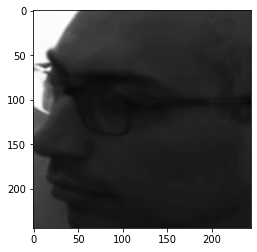

In [170]:
plt.imshow(crop_frame)

In [171]:
KSS_probas = model.predict(np.expand_dims(crop_frame, axis=0))[0]

<BarContainer object of 10 artists>

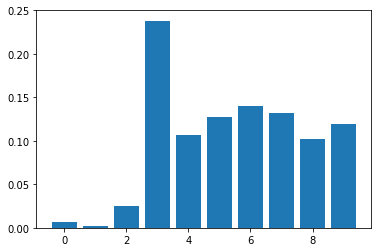

In [172]:
plt.bar(range(10), KSS_probas)

In [111]:
pd.DataFrame(KSS_probas).describe()

,0
count,10.000000
mean,0.100000
std,0.072104
min,0.001936
25%,0.044492
50%,0.112908
75%,0.130702
max,0.238241


In [77]:
import pandas as pd
import matplotlib.pyplot as plt